In [1]:
## test02_dataset04 adds one Dense layer of 128 units
## between the Flatten and the output layer.
## Its activation algo is relu.
## Dataset used is pqd_dataset_04.

In [2]:
# Import dependencies
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, utils, activations
from tensorflow.keras import optimizers, losses, metrics
from google.colab import drive

In [3]:
# Connect to the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import the training dataset
training_dataset = utils.image_dataset_from_directory(
    directory='/content/drive/My Drive/pqd_dataset_04/training_set',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 3000 files belonging to 10 classes.


In [5]:
# Import the validation dataset
validation_dataset = utils.image_dataset_from_directory(
    directory='/content/drive/My Drive/pqd_dataset_04/validation_set',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 1000 files belonging to 10 classes.


In [6]:
# Import the testing dataset
testing_dataset = utils.image_dataset_from_directory(
    directory='/content/drive/My Drive/pqd_dataset_04/testing_set',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 1000 files belonging to 10 classes.


In [7]:
# Build the CNN model
cnn = models.Sequential()
# Add first convolution layer
cnn.add(layers.Conv2D(
    filters=32, 
    kernel_size=(5, 5), 
    padding='valid', 
    activation='relu', 
    input_shape=(200, 200, 1)
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add second convolution layer
cnn.add(layers.Conv2D(
    filters=48, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add final convolution layer
cnn.add(layers.Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
# Add flatten layer
cnn.add(layers.Flatten())
# Add Dense layer of 128 units
cnn.add(layers.Dense(
    units=128,
    activation='relu'
  )
)
# Add the final fully-connected layer
cnn.add(layers.Dense(
    units=10,
    activation='softmax'
    )
)

In [8]:
# Show the structure of the CNN
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 average_pooling2d (AverageP  (None, 98, 98, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 48)        13872     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 48)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        27712     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [9]:
# Configure the CNN for training
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Train the CNN for 10 epochs with the training dataset
# Validate the CNN with the validation dataset
history = cnn.fit(
    training_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
94/94 [==============================] - 669s 7s/step - loss: 45.2797 - accuracy: 0.7047 - val_loss: 0.2446 - val_accuracy: 0.9280
Epoch 2/10
94/94 [==============================] - 8s 83ms/step - loss: 0.1029 - accuracy: 0.9663 - val_loss: 0.1102 - val_accuracy: 0.9680
Epoch 3/10
94/94 [==============================] - 8s 82ms/step - loss: 0.0833 - accuracy: 0.9713 - val_loss: 0.1288 - val_accuracy: 0.9670
Epoch 4/10
94/94 [==============================] - 8s 82ms/step - loss: 0.0644 - accuracy: 0.9737 - val_loss: 0.1226 - val_accuracy: 0.9620
Epoch 5/10
94/94 [==============================] - 8s 84ms/step - loss: 0.0665 - accuracy: 0.9737 - val_loss: 0.1051 - val_accuracy: 0.9550
Epoch 6/10
94/94 [==============================] - 8s 86ms/step - loss: 0.5417 - accuracy: 0.8997 - val_loss: 1.9132 - val_accuracy: 0.3980
Epoch 7/10
94/94 [==============================] - 8s 85ms/step - loss: 0.8311 - accuracy: 0.7583 - val_loss: 0.5267 - val_accuracy: 0.8720
Epoch 8/10
9

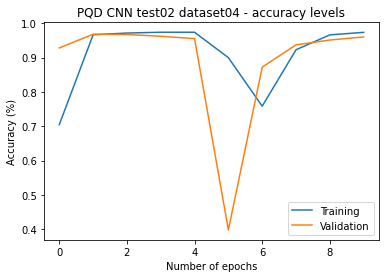

In [11]:
# Plot the training and validation accuracy of the CNN
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('PQD CNN test02 dataset04 - accuracy levels')
plt.ylabel('Accuracy (%)')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

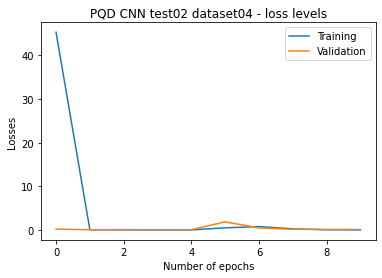

In [12]:
# Plot the training and validation loss levels of the CNN
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('PQD CNN test02 dataset04 - loss levels')
plt.ylabel('Losses')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [13]:
# Evaluate the CNN with the testing dataset
results = cnn.evaluate(
    testing_dataset
)

32/32 [==============================] - 176s 4s/step - loss: 0.1064 - accuracy: 0.9690


In [14]:
# Save the trained model
cnn.save('/content/drive/My Drive/saved_models/pqd_cnn_test02_dataset04_model')
cnn.save('/content/drive/My Drive/saved_models/pqd_cnn_test02_dataset04_model.h5')

INFO:tensorflow:Assets written to: /content/drive/My Drive/saved_models/pqd_cnn_test02_dataset04_model/assets
